In [1]:
import glob
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp
from LRUandJaxLIB import *
import os

gloober = [path for path in glob.glob("/root/Project/jax_machinelearning/grid_search20/*") if not os.path.isdir(path)]


['/root/Project/jax_machinelearning/grid_search20/results0 time 2025-01-09 17:00:57.466173.pkl', '/root/Project/jax_machinelearning/grid_search20/results2 time 2025-01-09 17:50:28.743454.pkl', '/root/Project/jax_machinelearning/grid_search20/results1 time 2025-01-09 17:10:51.206872.pkl', '/root/Project/jax_machinelearning/grid_search20/results2 time 2025-01-09 17:20:45.940925.pkl', '/root/Project/jax_machinelearning/grid_search20/results1 time 2025-01-09 16:41:08.727061.pkl', '/root/Project/jax_machinelearning/grid_search20/results0 time 2025-01-09 16:31:15.080877.pkl', '/root/Project/jax_machinelearning/grid_search20/results2 time 2025-01-09 16:21:21.282407.pkl', '/root/Project/jax_machinelearning/grid_search20/results2 time 2025-01-09 16:51:03.392552.pkl', '/root/Project/jax_machinelearning/grid_search20/results0 time 2025-01-09 16:01:11.038333.pkl', '/root/Project/jax_machinelearning/grid_search20/results1 time 2025-01-09 16:11:28.092768.pkl', '/root/Project/jax_machinelearning/grid

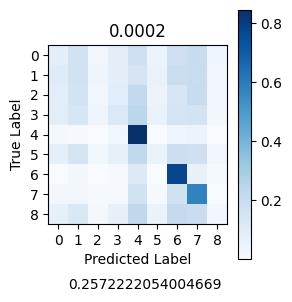

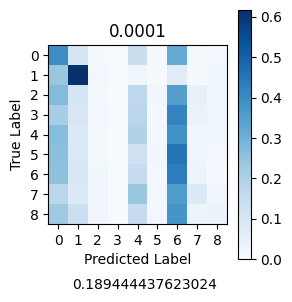

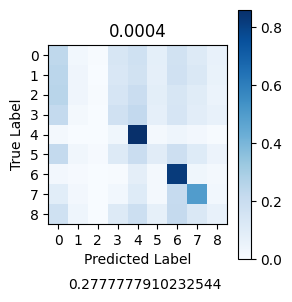

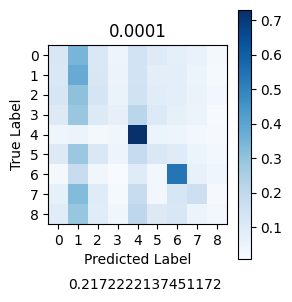

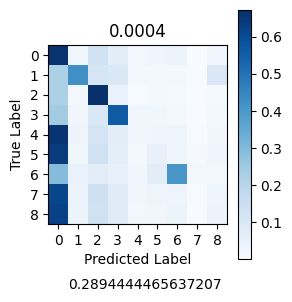

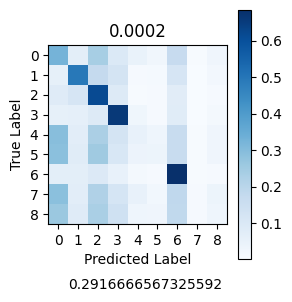

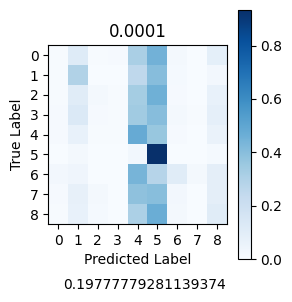

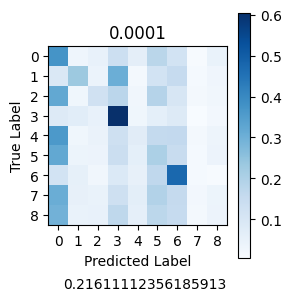

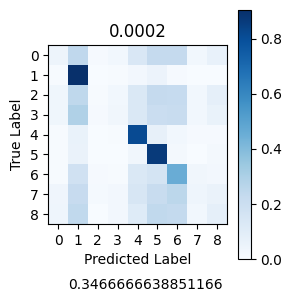

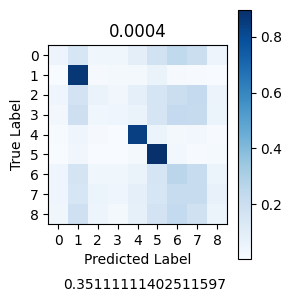

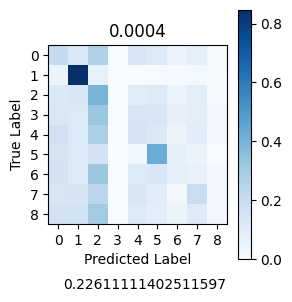

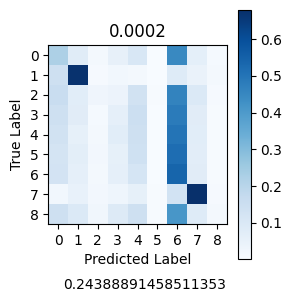

In [3]:
test_file_path = "/root/Project/jax_machinelearning/datasets/8mfsk/absolute_doppler_waveforms_CNO_[14.2],[10]_and0_samprate_2000_1736437896.2224333.pkl"

print(gloober)




for idk, glib in enumerate(gloober):
    with open(glib, "rb") as f:
        res = pkl.load(f)
        maximum_argument = np.argmax(res["Accuracy Measurements"]["Training accuracy"])
        model_parameters = res["Model Parameters"][maximum_argument]


   
    batch_size = 10

    train_sequences, train_labels, _, __ = load_data(test_file_path, batch_size, 9, 0.8)

    # Confusion matrix
    Confusion_count = np.zeros([9,9])

    Confusion_count

    for x, y in zip(train_sequences, train_labels):
        infer = np.argmax(batch_model_forward3(x, model_parameters, 0, jax.random.key(1), True),axis=1)
        truth = np.argmax(y, axis=1)
        for k,z in zip(truth, infer):
            Confusion_count[k,z] += 1

    for x, y in zip(_, __):
        infer = np.argmax(batch_model_forward3(x, model_parameters, 0, jax.random.key(1), True),axis=1)
        truth = np.argmax(y, axis=1)
        for k,z in zip(truth, infer):
            Confusion_count[k,z] += 1

    Confusion_matrix = np.zeros([9,9])
    for idx, con in enumerate(Confusion_count):
        sum = np.sum(con)
        Confusion_matrix[idx] = con/sum


    fig, ax = plt.subplots(figsize = (3,3))

    im = ax.imshow(Confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)

    ax.set(xticks=np.arange(Confusion_matrix.shape[0]),
        yticks=np.arange(Confusion_matrix.shape[1]),
        xlabel = 'Predicted Label',
            ylabel = 'True Label',
            title = 'Confusion Matrix' )

    ax.set_title(f'{res["Learning Schedule"]["Value"]}')
    fig.text(0.50, 0.02,f'{res["Accuracy Measurements"]["Testing accuracy"][maximum_argument]}', 
    horizontalalignment='center', wrap=True ) 
    plt.tight_layout()
    plt.savefig(f"/root/Project/jax_machinelearning/grid_search20/visual/confusion{idk}.pdf")
    #plt.show()

    np.trace(Confusion_matrix)/np.sum(Confusion_matrix)